### **Import Dependecies**

In [1]:
import os
import cv2
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt

### **Extracting Key Points on Hand Landmarks**

In [2]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    
    return image, results

In [4]:
# trying open webcam

cap = cv2.VideoCapture(2)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

- count
- face_landmarks
- index
- left_hand_landmarks
- mro
- pose_landmarks
- pose_world_landmarks
- right_hand_landmarks
- segmentation_mask

In [4]:
# drawing all the hands landmark

def draw_landmarks(image, results):
    # Draw hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [5]:
# open webcam + using landmark

cap = cv2.VideoCapture(2)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

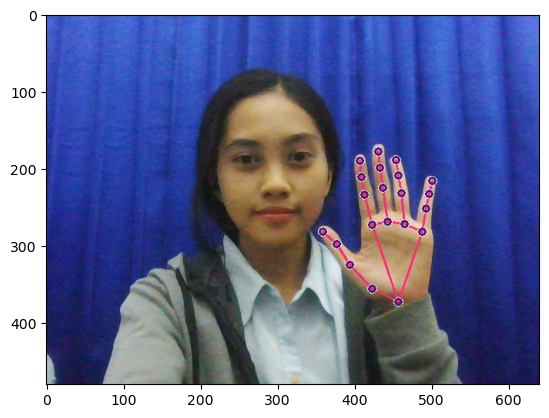

In [6]:
# 6

draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [7]:
# extracting all the landmark keypoints

def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([lh, rh])

In [8]:
result_test = extract_keypoints(results)
extract_keypoints(results).shape

(126,)

### **Setup folders for data collection**

In [9]:
cd ..

c:\Users\melli\Dropbox\PC\Downloads\sign-lang-capstone


In [57]:
# 9: membuat folder dataset (dari 0 - mau berhenti di folder apa)

# Path for exported data, numpy arrays, images
DATA_PATH = 'DATASET'
IMAGE_DATA_PATH = 'DATASET_IMAGES'

# Actions that we try to detect
actions = np.array(['Saya'])

# Define the range for sequence numbering
start_folder = 0
end_folder = 25

# Videos are going to be 30 frames in length
sequence_length = 30

# Loop through each action to create directories for both data and images
for action in actions:
    # Paths for keypoints data and images
    action_data_path = os.path.join(DATA_PATH, action)
    action_image_path = os.path.join(IMAGE_DATA_PATH, action)

    # Ensure directories exist for both keypoints and images
    os.makedirs(action_data_path, exist_ok=True)
    os.makedirs(action_image_path, exist_ok=True)

    # Create directories starting from start_folder to end_folder - 1
    for sequence in range(start_folder, end_folder):
        new_data_dir = os.path.join(action_data_path, str(sequence))
        new_image_dir = os.path.join(action_image_path, str(sequence))
        
        os.makedirs(new_data_dir, exist_ok=True)
        os.makedirs(new_image_dir, exist_ok=True)


### **Collect keypoint values for training and testing**

In [43]:
# just trying to setup

cap = cv2.VideoCapture(2)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [60]:
# Set base directories for keypoints and images (sesuain sama nama folder masing")

DATA_PATH = 'DATASET' 
IMAGE_DATA_PATH = 'DATASET_IMAGES'
actions = ['Saya']

no_sequences = 25 # Number of sequences per action
sequence_length = 30 # Number of frames per sequence
start_sequence = 0 # Starting sequence number

In [61]:
# membuat dataset

# Inisialisasi webcam capture
cap = cv2.VideoCapture(2)

# Inisialisasi model MediaPipe Holistic dengan threshold kepercayaan
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():  # Terus menangkap frame hingga ditutup secara manual
        
        # Countdown sebelum pengambilan gambar dimulai
        for i in range(3, 0, -1):
            ret, frame = cap.read()
            cv2.putText(frame, f'Starting in {i}', (200, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 4, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', frame)
            cv2.waitKey(1000)  # Tunggu selama 1 detik


        # Loop melalui tindakan
        for action in actions:
            # Loop melalui urutan
            for sequence in range(start_sequence, start_sequence + no_sequences):
                # Loop melalui frame dalam setiap urutan
                for frame_num in range(sequence_length):
                    # Baca frame dari feed webcam
                    ret, frame = cap.read()

                    # Lakukan deteksi menggunakan model Holistic
                    image, results = mediapipe_detection(frame, holistic)

                    # Gambar landmarks pada frame
                    draw_landmarks(image, results)

                    # Tampilkan pesan status
                    if frame_num == 0:
                        cv2.putText(image, 'STARTING_COLLECTION', (120, 200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),
                                    (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                        
                        # Tampilkan ke layar
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(3000)  # Tunggu selama 3 detik

                    else:
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),
                                    (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                        # Tampilkan frame dengan landmarks
                        cv2.imshow('OpenCV Feed', image)

                    # Ekstraksi keypoints dan simpan ke file NumPy array
                    keypoints = extract_keypoints(results)

                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    # Simpan gambar
                    img_path = os.path.join(IMAGE_DATA_PATH, action, str(sequence), f"{frame_num}.jpg")
                    cv2.imwrite(img_path, image)

                    # Break out of the loop if 'q' is pressed
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

                # Tampilkan pesan jeda sebelum mulai urutan video berikutnya
                if sequence < start_sequence + no_sequences - 1:
                    cv2.putText(image, 'WAITING 3 SECONDS', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)  # Tunggu selama 3 detik sebelum memulai urutan berikutnya

        # Lepaskan sumber daya webcam dan tutup jendela OpenCV
        cap.release()
        cv2.destroyAllWindows()